## Relax Inc Challenge
April 12, 2022

In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
def plot_auc_curve(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## 1 Data Wrangling

In [4]:
#Read the data into DataFrame
df = pd.read_csv('takehome_user_engagement.csv')
df_user = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1" )


In [5]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
# Let's convert time_stamp to pandas datetime

df['time_stamp'] = pd.to_datetime(df['time_stamp'])

In [8]:
# Since time is of no value let's drop time from timestamp and keep date

df['date'] = pd.to_datetime(df['time_stamp'].dt.date)
df.drop(['time_stamp'], inplace= True,  axis = 1)
df.head()

,user_id,visited,date
0,1,1,2014-04-22
1,2,1,2013-11-15
2,2,1,2013-11-29
3,2,1,2013-12-09
4,2,1,2013-12-25


In [9]:
df['visited'].unique()

array([1])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  207917 non-null  int64         
 1   visited  207917 non-null  int64         
 2   date     207917 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [11]:
# Since visited column has only 1 as the value, we can remove any usr logged 
# in more than once in a single day by just droping the duplicates

df =df.drop_duplicates()

In [12]:
# Let's take this input and detemine if the user is adopted or not

from datetime import timedelta

def adopted_user(user_id):
    
    user = df.loc[df['user_id'] == user_id]
    user = user.reset_index(drop=True)
    if len(user)<3:
        adopted = 0
    else:
        for i in range(len(user)-2):
            if user['date'][i+2]- user['date'][i] <= timedelta(days= 7):
                adopted = 1
                break
            else:
                adopted = 0       
    return adopted


In [13]:
# let's apply teh above function to all user_id
df_user['adopted'] = df_user['object_id'].apply(adopted_user)
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [14]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted                     12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [15]:
# Too may data missing for invited_by_user_id so lets drop it
df_user.drop(['invited_by_user_id'], axis = 1, inplace = True)

In [16]:
# Lets convert time to datetime format
df_user['creation_time'] = pd.to_datetime(df_user['creation_time'])
df_user['last_session_creation_time'] =pd.to_datetime(df_user['last_session_creation_time'], unit ='s')

In [17]:
# Let's create the account usage length from these two time info
df_user['usage_days'] = (df_user['last_session_creation_time']- df_user['creation_time']).dt.days

# Creation time and last session are not very important at all so lets drop them
df_user.drop(['creation_time','last_session_creation_time'], axis = 1, inplace = True)

In [18]:
# Email, Name, object id are not very  relevant for analysis
df_user.drop(['object_id','name','email'], axis = 1, inplace = True)
df_user.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,usage_days
0,GUEST_INVITE,1,0,11,0,0.0
1,ORG_INVITE,0,0,1,1,136.0
2,ORG_INVITE,0,0,94,0,0.0
3,GUEST_INVITE,0,0,1,0,1.0
4,GUEST_INVITE,0,0,193,0,5.0


## 2 Exploratory Data Analysis

In [19]:
# Check for null values
df_user.isnull().sum()

creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
adopted                          0
usage_days                    3177
dtype: int64

In [20]:
# Since usage_days is missing from some data let's remove the rows that has missing data
df_user = df_user.dropna()

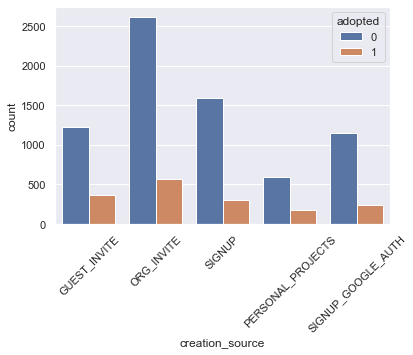

In [21]:
# Let's look at the distribution of source
sns.countplot(x = 'creation_source', hue = 'adopted', data = df_user )
plt.xticks(rotation = 45)
plt.show()

In [22]:
# let's make dummy variable for creation source

df_tmp = pd.get_dummies(df_user['creation_source'], drop_first=True)

In [23]:
df = pd.concat([df_user, df_tmp], axis=1).drop('creation_source', axis=1)
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,usage_days,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,11,0,0.0,0,0,0,0
1,0,0,1,1,136.0,1,0,0,0
2,0,0,94,0,0.0,1,0,0,0
3,0,0,1,0,1.0,0,0,0,0
4,0,0,193,0,5.0,0,0,0,0


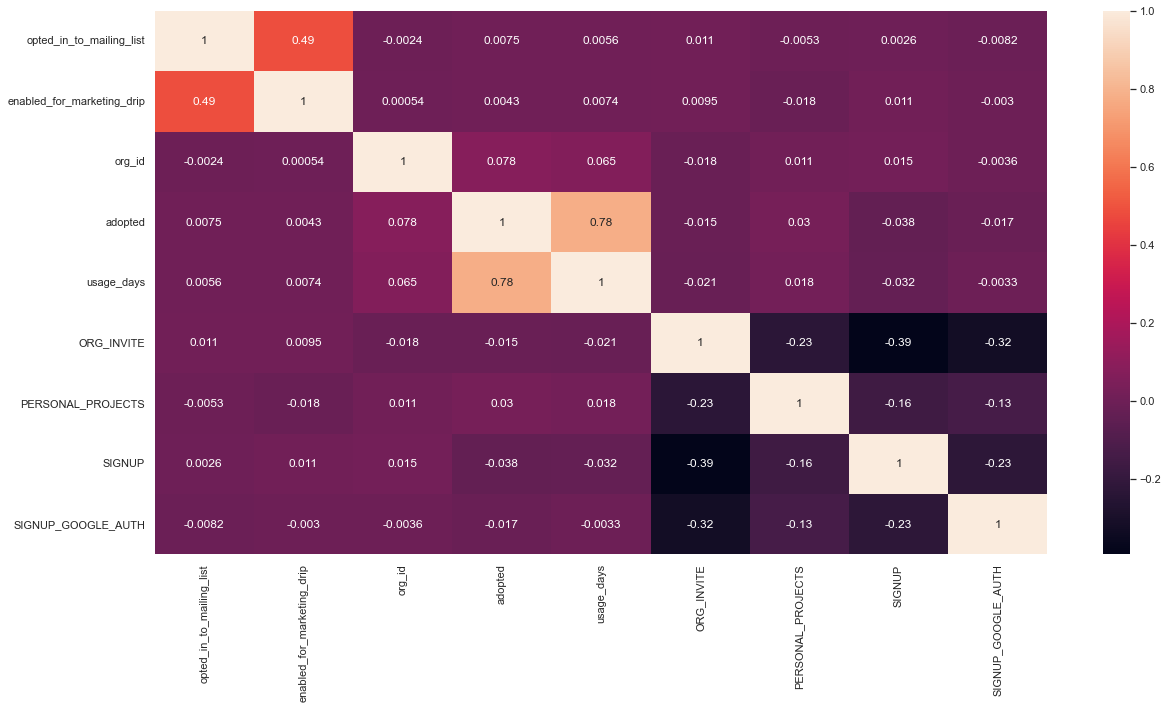

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot= True)
plt.show()

In [25]:
df.corr()['adopted'].sort_values(ascending = False)

adopted                       1.000000
usage_days                    0.777844
org_id                        0.077748
PERSONAL_PROJECTS             0.029523
opted_in_to_mailing_list      0.007485
enabled_for_marketing_drip    0.004290
ORG_INVITE                   -0.014719
SIGNUP_GOOGLE_AUTH           -0.016719
SIGNUP                       -0.038315
Name: adopted, dtype: float64

Usage days seems to have high correlation with adoption which makes sense

## 3 Predictive Modeling

In [26]:
# Data looks pretty clean now. Let's separate the data into target and features

X = df.drop(['adopted'], axis = 1)
y = df['adopted']

In [27]:
# Let's split the data into training and testing set

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Model Build and fit

RF_pipe = RandomForestClassifier()
RF_pipe.fit(X_train, y_train);
model_name = RF_pipe
model_name.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [29]:
# Hyperparameter Tuning

grid_params = { 'n_estimators': [20, 50, 100, 200],'max_features': ['sqrt', 'log2']}
rf_grid_cv = GridSearchCV(model_name, param_grid=grid_params, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train);
print(rf_grid_cv.best_params_)
print(rf_grid_cv.best_score_)

{'max_features': 'sqrt', 'n_estimators': 200}
0.9600755485566106


In [33]:
# Model Tuneup using best params

rf2=RandomForestClassifier(max_features = 'sqrt', n_estimators= 200)
rf2.fit(X_train,y_train)
print("score",rf2.score(X_test,y_test))

score 0.959478021978022


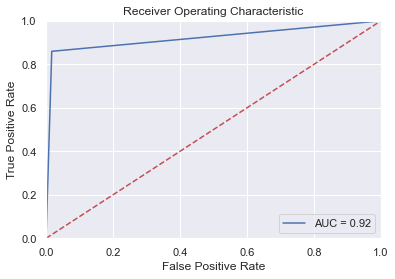

In [34]:
# Prediction and score
y_pred_rf2 = rf2.predict(X_test)
plot_auc_curve(y_test, y_pred_rf2)

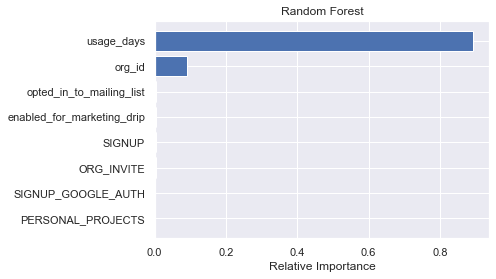

In [35]:
# feature Importnace
model = rf2

fig, ax = plt.subplots(1,1)
importances = model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

ax.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.set(title='Random Forest')
ax.set(xlabel='Relative Importance')
ax.set_yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

Usage days is the most important feature so the spending money to improve other features is not that important.